# 2. Die elementaren Gates

Qiskit ist vor allem bei der Visualisierung von Quantenzuständen sowie der Veranschaulichung der Wirkung von Quantengates nützlich. Wir wollen Qiskit hier nutzen, um die Wirkungen der uns bereits bekannten Gates zu beobachten und stellen dazu auch leich verschiedene Visualisierungsverfahren vor. Diese werden in den folgenden Notebooks ausführlicher erklärt. Wir bauen zunächst einen Schaltkreis mit zwei Qubits und zwei klassischen Bits auf.

**Anmerkung:** Beachten Sie, dass die Qubitreihenfolge in Qiskit umgekehrt ist als oft in der Literatur und auch im Buch verwendet. Der Zustand eines Registers stellt sich hier also so dar: $|q_n ... q_1 q_0\rangle$, wobei $q_0$ jeweils das Qubit in der obersten Zeile des Schaltkreises ist.


## 2.1 Bibliotheken einbinden
Der erste Schritt besteht immer darin, von Qiskit die benöigten Bibliotheken einzubinden:

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram
%matplotlib inline
from math import sqrt, pi

## 2.2 Schaltkreis initialisieren und Gates anwenden
Danach wird der Quantenschaltkreis definiert und die Qubits initialisiert sowie das Backend definiert:

In [2]:
qc = QuantumCircuit(2, 2)
anfangszustand = [0,1]   # Hier wird der Ausgangszustand zu |1> definiert
qc.initialize(anfangszustand, 1)
#qc.initialize([0, 0, 1, 0])
backend = BasicAer.get_backend('statevector_simulator')

Das Qubit q[0] befindet sich im Zustand $|0\rangle$ und das Qubit q[1] im Zustand $|1\rangle$. Der Registerzustand ist demnach  $|1\rangle|0\rangle=|10\rangle$ (S. Buch Abschn. 16.4 und 21.3). Der Zustandsvektor des Registers ist $[0,0,1,0]$. Deshalb können wir die beiden Qubits (d. h. das Register) alternativ auch als Ganzes initialisieren:

&nbsp;&nbsp;&nbsp;&nbsp; qc.initialize($[0,0,1,0]$)

Probieren Sie es aus! Das Resultat ist dasselbe.


Da wir mit dem `statevector_simulator` arbeiten, können wir die beiden Zustände mithilfe von `plot_bloch_multivector` in je einer Blochkugel darzustellen (S. Notebook 7). Dazu benötigen wir die beiden folgenden Befehle:

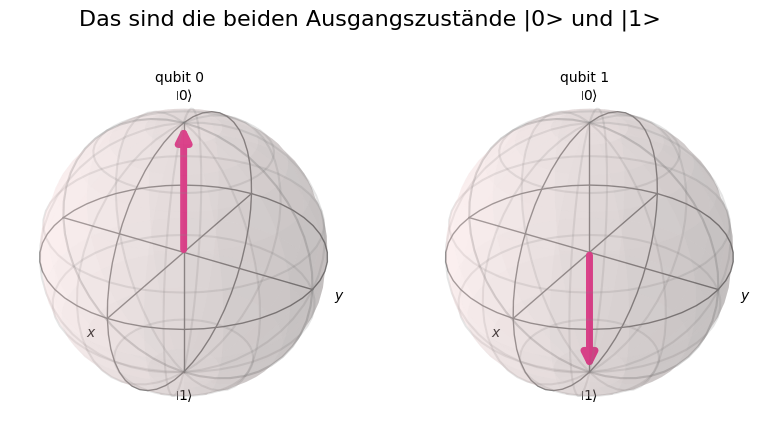

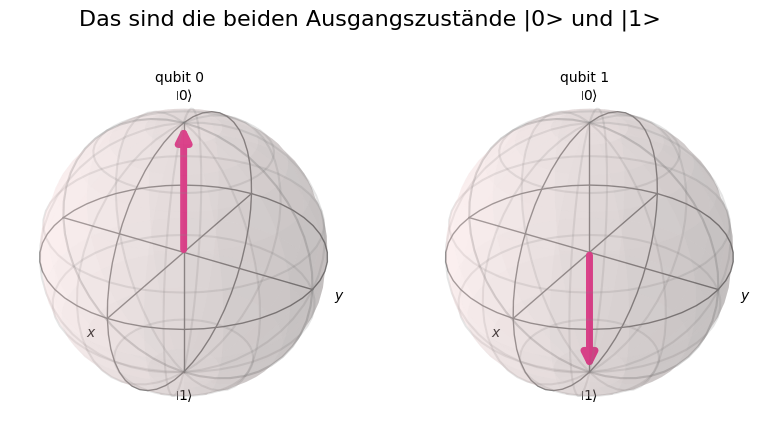

In [3]:
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Das sind die beiden Ausgangszustände |0> und |1>")

## 2.3 Die Wirkung der elementaren Gates

Nun können wir damit beginnen, die uns bekannten Gates auf die beiden Qubits anzuwenden und das Ergebnis gleich wieder mit den beiden Blochkugeln darzustellen:

### Das Hadamard-Gate

Das Hadamard-Gate $H$ wird auf die beiden Ausgangszustände $|0\rangle$ und  $|1\rangle$ angewendet:

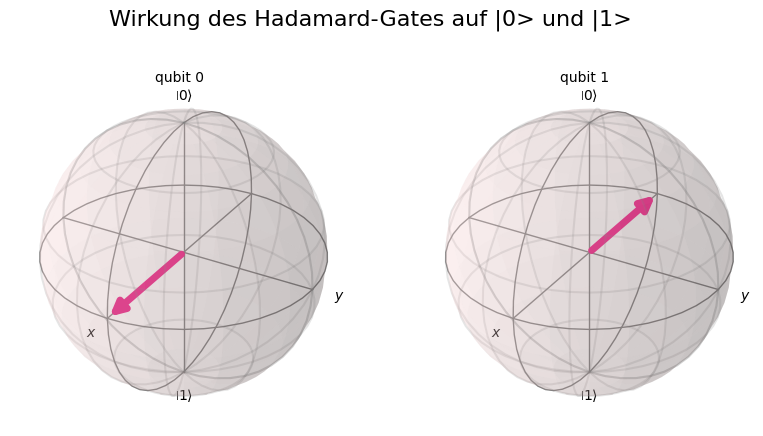

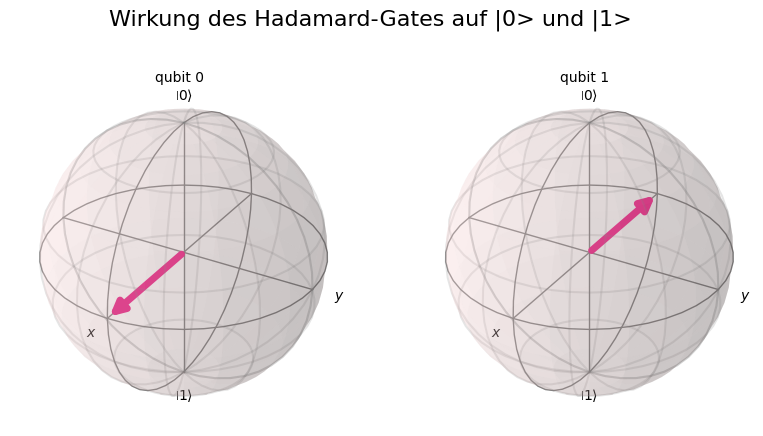

In [4]:
qc.barrier()
qc.h(0)
qc.h(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

Das Ergebnis ist in der Abb. oben zu sehen: $H$ legt den Vektor $|0\rangle$ in die $x$-Achse in positiver Richtung und den Vektor $|1\rangle$ ebenfalls in die $x$-Achse, aber in negativer Richtung. Die beiden Vektoren haben keine Komponente in $z$-Richtung. Das bedeutet, dass die Messwahrscheinlichkeit eine $0$ oder eine  $1$ zu messen beide jeweils bei $p=0.5$ bzw. bei $50\%$ liegen. Deshalb sind die Zustände in der uns bereits bekannten Weise zu schreiben:

$H|0\rangle=\tfrac{1}{\sqrt{2}}|0\rangle+\tfrac{1}{\sqrt{2}}|1\rangle$ bzw. $H|1\rangle=\tfrac{1}{\sqrt{2}}|0\rangle-\tfrac{1}{\sqrt{2}}|1\rangle$.

Auf diese beiden Zustände lassen wir nun das $X$-Gate los:

### Das Pauli $X$-Gate

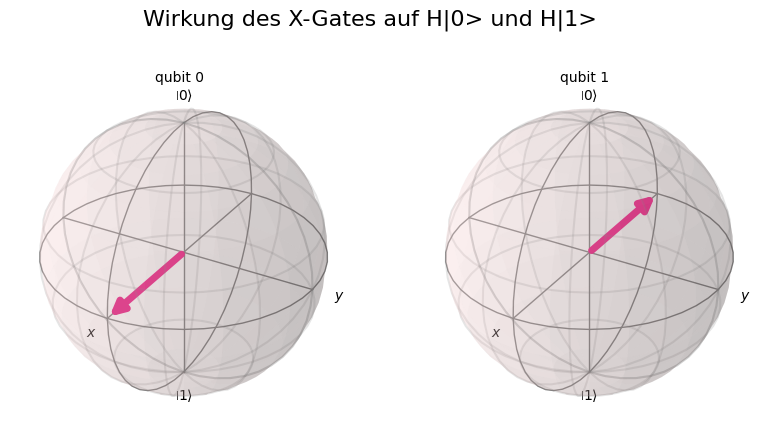

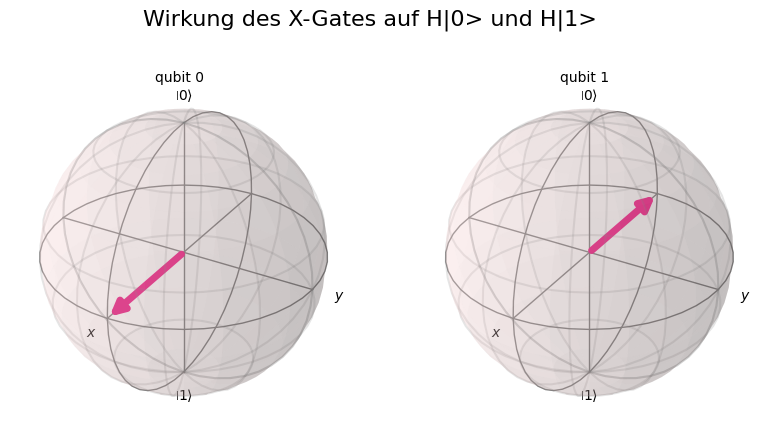

In [5]:
#qc.initialize([0,1,0,0])
qc.x(0)
qc.x(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des X-Gates auf H|0> und H|1>")

Wie Sie sehen, hat sich nichts verändert. Das Pauli $X$-Gate scheint eine Drehung um die $X$-Achse zu bewirken.

### Das Pauli $Y$-Gate

Dieses wird nun auf den Folgezustand von oben angewendet:

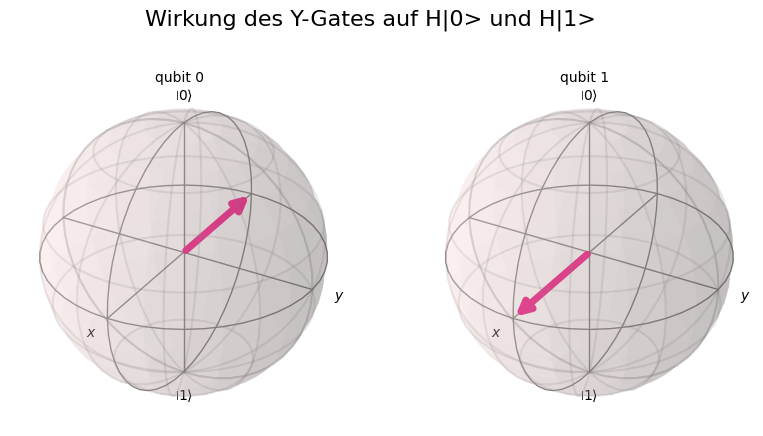

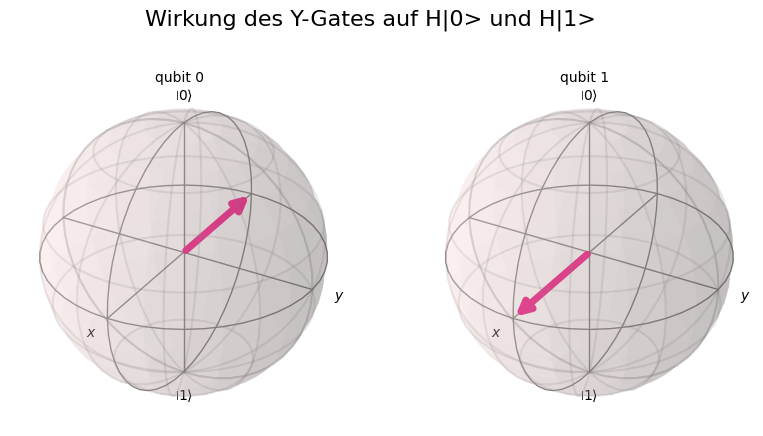

In [6]:
#qc.initialize([0,1,0,0])
qc.y(0)
qc.y(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Y-Gates auf H|0> und H|1>")

Die Zustandsvektoren zeigen nun in die entgegengesetzte Richtung bez. des vorhergehenden Zustands. Das $Y$-Gate kann demnach in der Blochkugel-Darstellung als Rotation um die $Y$-Achse um den Winkel $\pi=180°$ aufgefasst werden. Lassen wir darauf nun das $Z$-Gate wirken:

### Das Pauli-$Z$-Gate

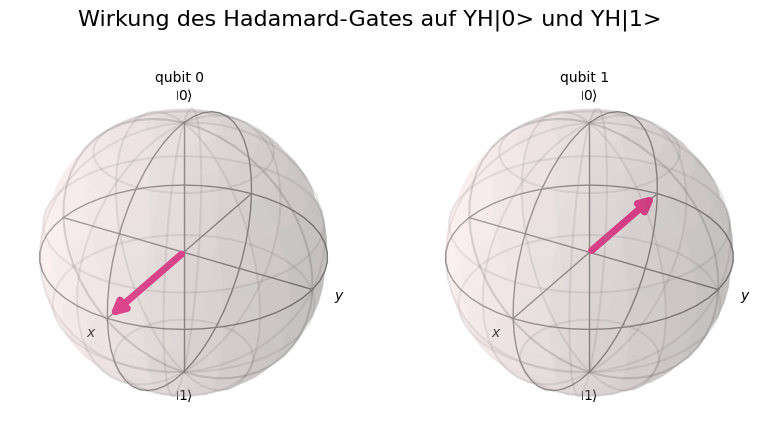

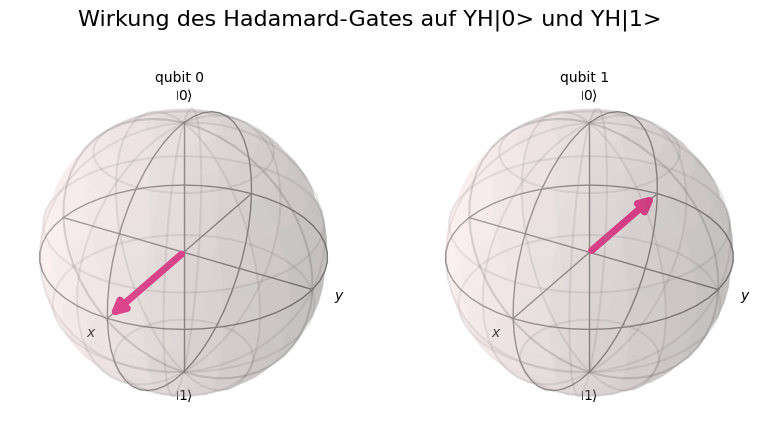

In [7]:
#anfangszustand = [0,1,0,0]   
#qc.initialize(anfangszustand)
qc.z(0)
qc.z(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf YH|0> und YH|1>")

Das $Z$-Gate kann somit als eine Rotation um die $z$-Achse um den Winkel $\pi=180°$ aufgefasst werden.

Die Pauli-Gates entsprechen also jeweils Rotationen um die entsprechende Achse $X$, $Y$ oder $Z$ um jeweils einen Winkel von $\pi=180°$.

### Schaltkreis zeichnen

Abschliessend zeichnen wir den Quantenschaltkreis. Er enthält alle Operationen, die wir bisher auf unser 2-Qubit Quantenregister nacheinander ausgeübt haben:

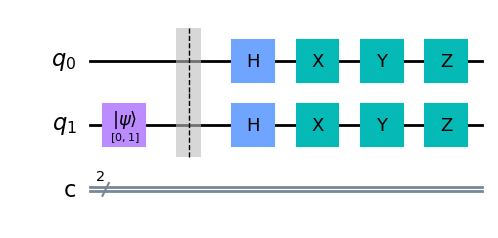

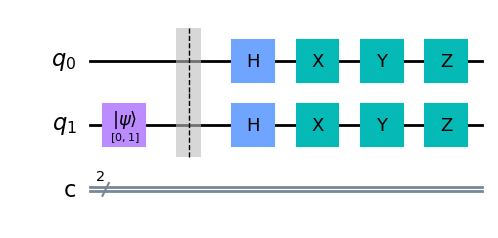

In [8]:
qc.draw('mpl')

Das Schaltbild zeigt uns direkt alle Operationen, die wir seit der Initialisierung auf die beiden Qubits ausgeübt haben. Anschliessend wollen wir untersuchen, wie mit den beiden Blochkugel-Darstellungen ein verschränkter Zustand darstellen lässt. Dazu erden die beiden Qubits erneut initialisiert. 




### Verschränkung von Qubits

Dazu versetzen wir die beiden Qubits in den Anfangszustand $|00\rangle$ zurück und wenden das $CNOT$-Gate nach dem $H$-Gate an.

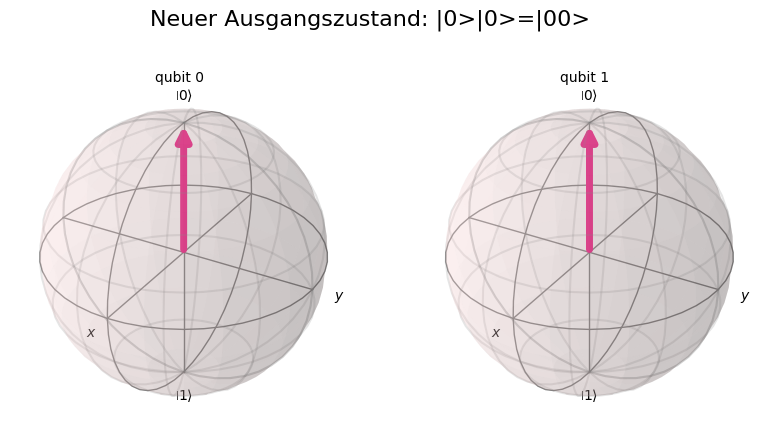

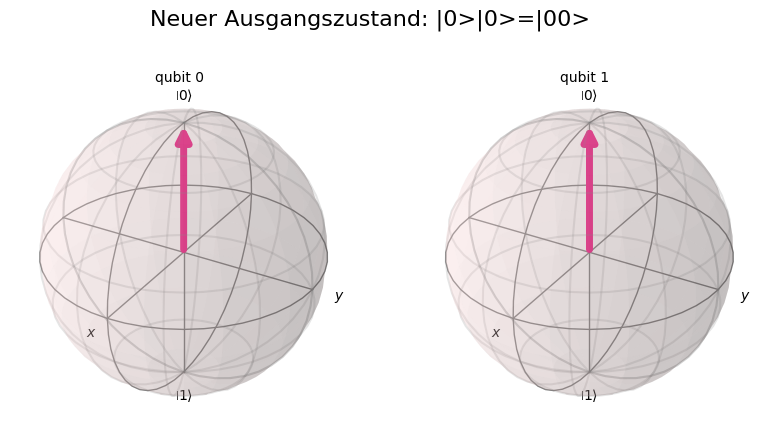

In [9]:
initial_state = [0,1]   # Hier wird der Ausgangszustand zu |1> definiert
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Neuer Ausgangszustand: |0>|0>=|00>")

Nun kommt die Verschränkungsoperation $CNOT$ $H$:

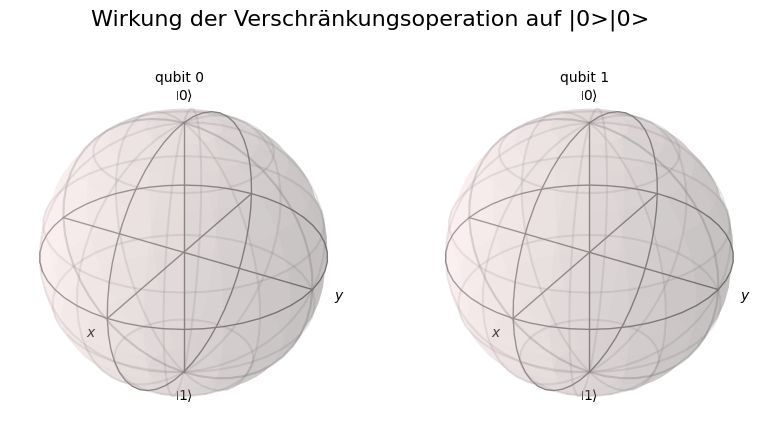

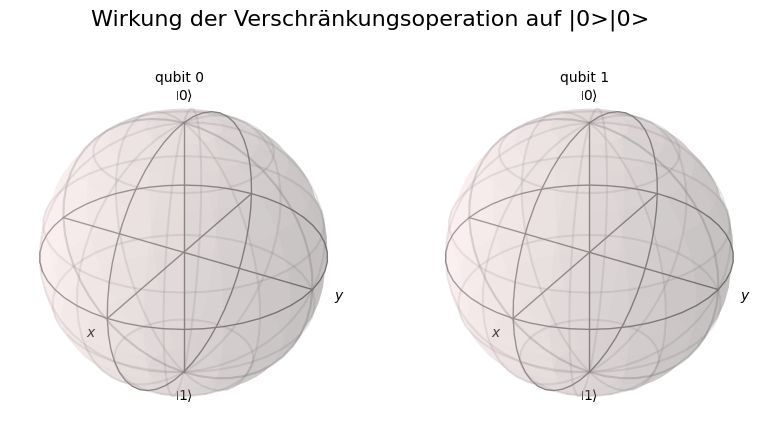

In [10]:
qc.h(0)
qc.cnot(0,1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung der Verschränkungsoperation auf |0>|0>")

**Ooops!** Die Zustandsvektoren sind verschwunden, was ist passiert? 
Wir haben hier die Verschränkungsoperation auf die beiden Qubits angewendet. Damit verlieren diese ihre Eigenständigkeit. Der Zustand eines Qubits ist nicht mehr eigenständig definiert. Nur der gemeinsame Zustand ergibt hier noch einen Sinn:
$$C_xH|00\rangle=\tfrac{1}{\sqrt{2}}|00\rangle+\tfrac{1}{\sqrt{2}}|11\rangle$$

Verschränkte Zustände lassen sich somit nicht mehr durch Blochkugeln darstellen. Dafür eignet sich die Q-sphere von Qiskit besser.Wir definieren den Schaltkreis neu, damit ist das Register wieder im Ausgangszustand $|00\rangle$.


### Schaltkreis zeichnen

Abschliessend zeichnen wir den Quantenschaltkreis. Er enthält alle Operationen, die wir bisher aud unser 2-Qubit Quantenregister ausgeübt haben:



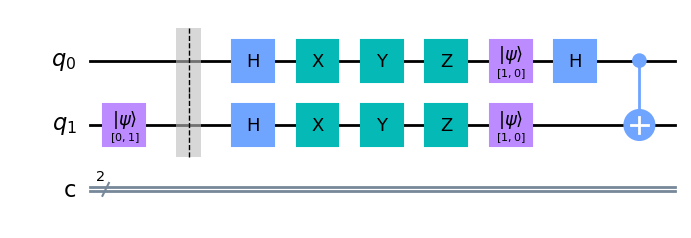

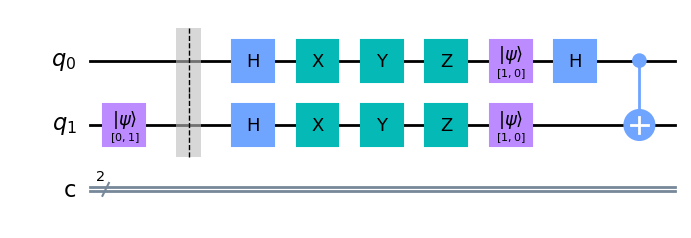

In [11]:
qc.draw('mpl')

## 2.3 Weitere Darstellungsmöglichkeiten

### Die Q-Sphere

In der Variablen qc ist immer noch der Registerzustand aus der vorhergehenden Zelle gespeichert. Diesen Zustand können wir auch in der Q-Sphere darstellen:

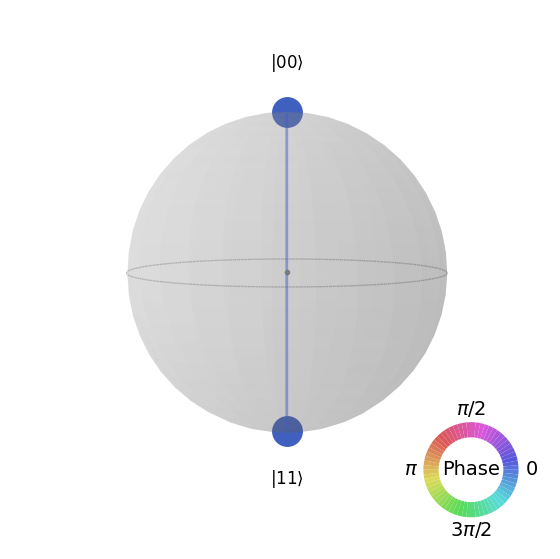

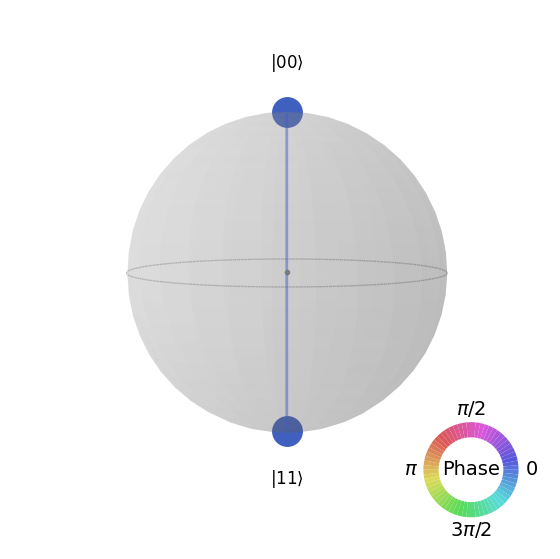

In [12]:
state = Statevector(qc)
plot_state_qsphere(state)

Für ein zweites Beispiel gehen wir vom Anfangszustand $|11\rangle$ aus. Dazu müssen wir die Qubits neu initialisieren:

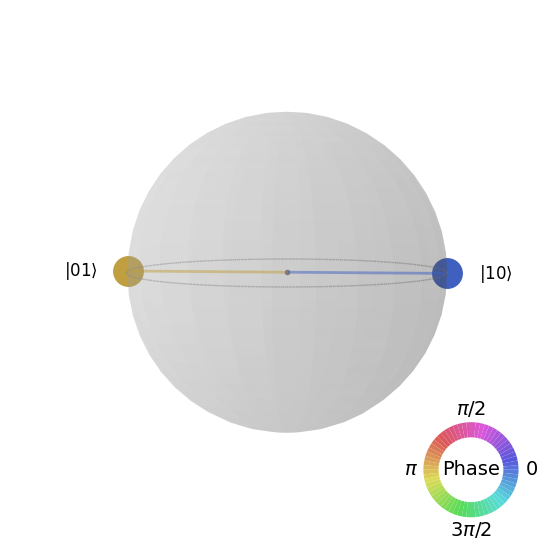

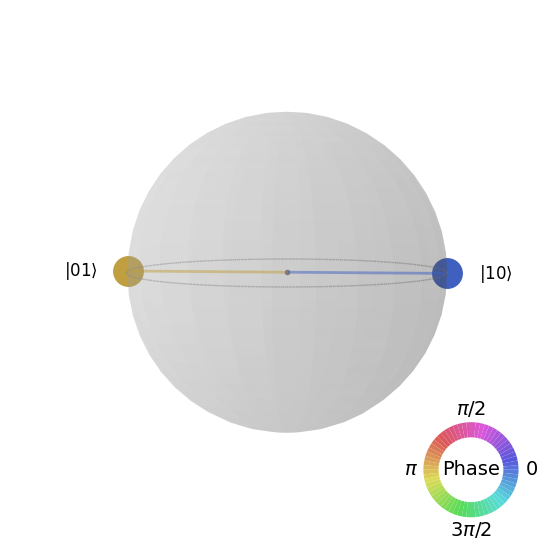

In [13]:
qc = QuantumCircuit(2)
qc.initialize([0,1], 0)
qc.initialize([0,1], 1)
qc.h(0)
qc.cx(0, 1)
state = Statevector(qc)
plot_state_qsphere(state)

Wir haben in der Variablen `qc` immer noch den Registerzustand aus der vorhergehenden Zelle gespeichert. Diesen Zustand können wir auch als Histogramm darstellen:

### Histogramm

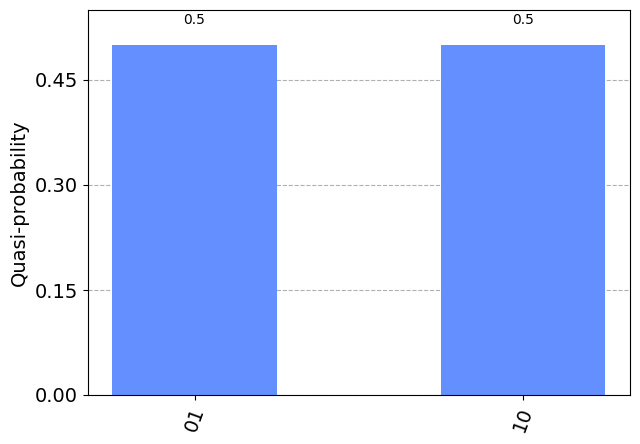

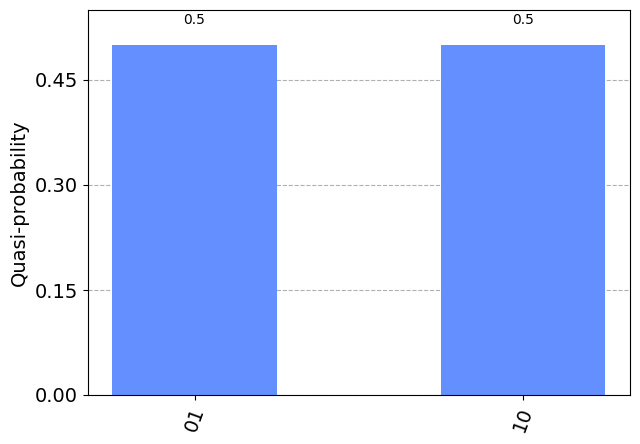

In [14]:
plot_histogram(execute(qc, backend).result().get_counts())

Das Histogramm stellt die Messwahrscheinlichkeiten für die beiden verschränkten Zustände dar.

### Pauli-Vektor

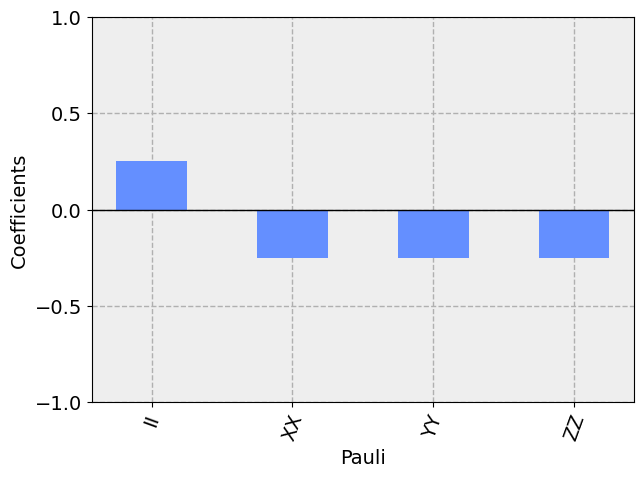

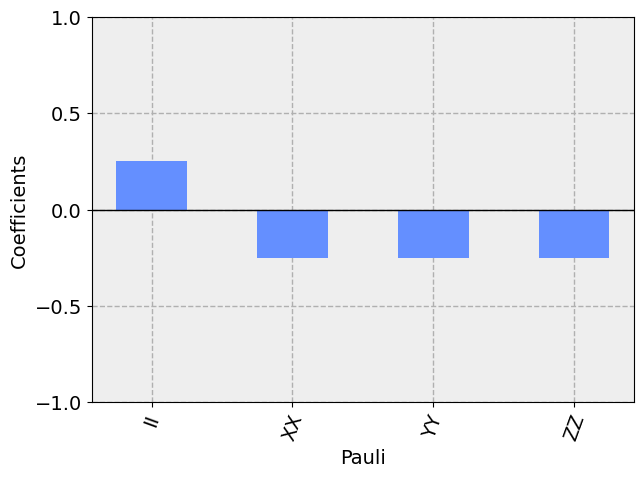

In [15]:
sv=Statevector(qc)
sv.draw(output='paulivec')

### City-Plot

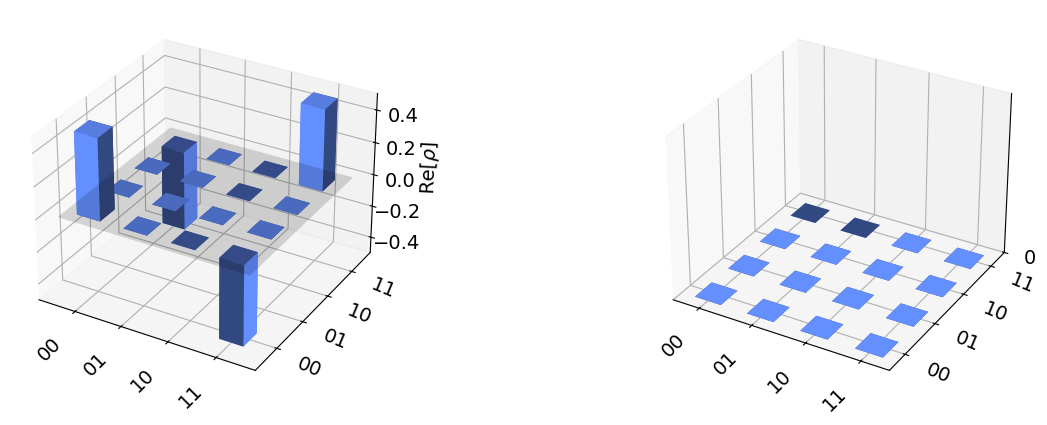

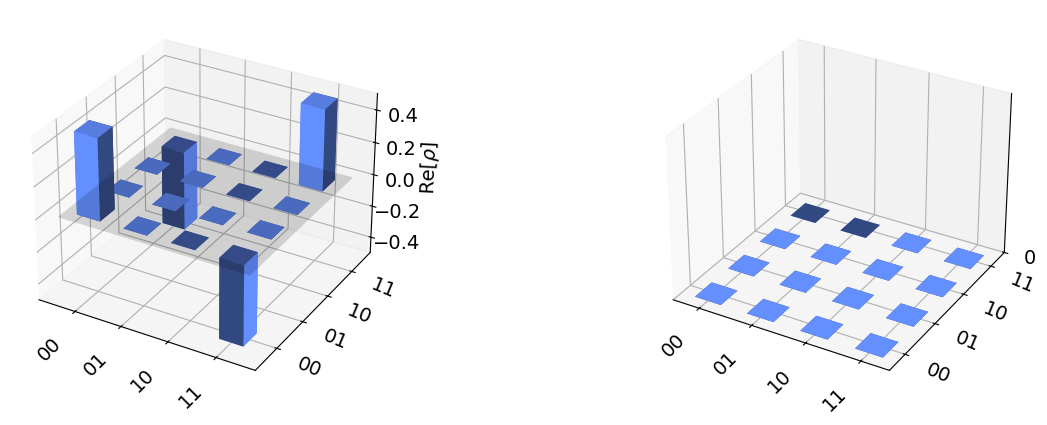

In [16]:
sv=Statevector([1/sqrt(2), 0, 0, -1/sqrt(2)])
sv.draw(output='city')

### Schaltkreis zeichnen
Auch den Schaltkreis können wir leicht zeichnen lassen:

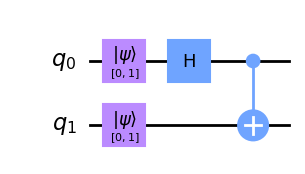

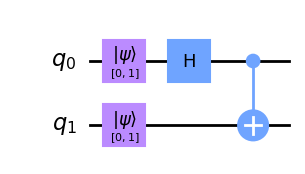

In [17]:
qc.draw('mpl')

Schliesslich wollen wir alle Qubits messen

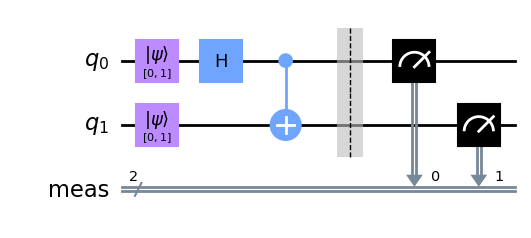

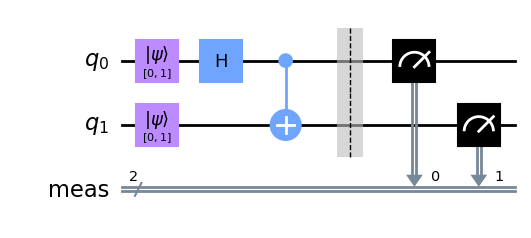

In [18]:
qc.measure_all()
qc.draw('mpl')

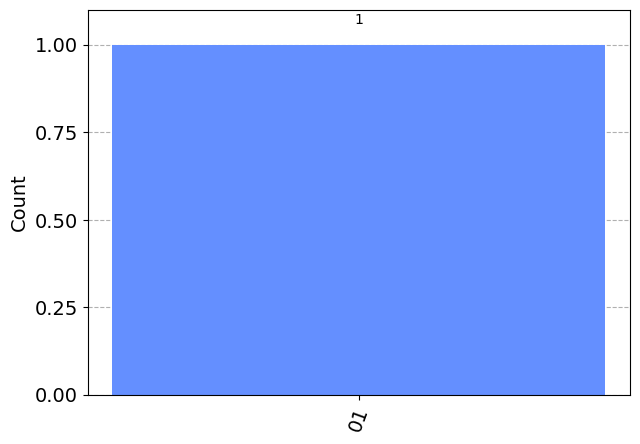

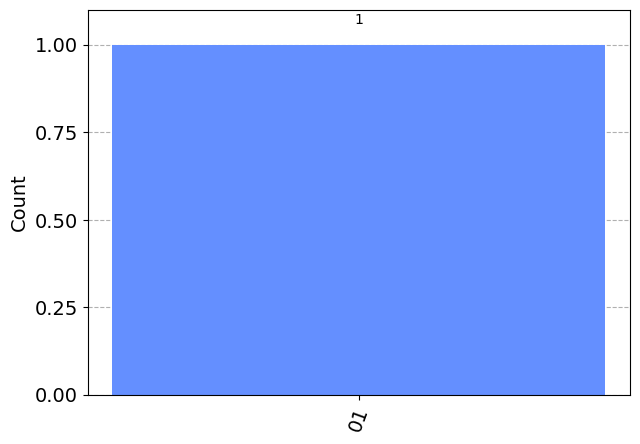

In [19]:
plot_histogram(execute(qc, backend).result().get_counts())